([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0], [0.0, -0.11995442708333333, -0.46081956393188894, -0.9966377729266679, -1.704501512804232, -2.5641949436473137, -3.557877644309849, -4.669805493945438, -5.886084350751226, -7.194452674160981, -8.584089689549637, -10.045446094131467, -11.570094655397412, -13.150598364661576, -14.780394082941546, -16.453689858779175, -18.165374311509904, -19.91093666225605, -21.686396161506135, -23.48823980915468, -25.313367392614705, -27.159042983108556, -29.022852131282722, -30.90266409245982, -32.796598490531075, -34.702995898936386, -36.62039187846302, -38.5474940656769, -40.48316195352852, -42.426389047795205, -44.37628712019223], [1.0, 1.0, 0.922217051188151, 0.6234043652010668, -0.022852940681069356, -1.1281156403900634, -2.7908357991613686, -5.097897084143536, -8.125974084123781, -11.942731905314028, -16.60788481121529, -22.174130

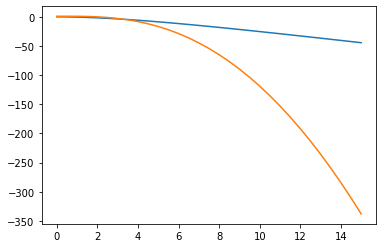

In [21]:
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from math import sin, pi, cos, sqrt, exp

def feval(funcName, *args):
        return eval(funcName)(*args)


def funcaoy(t,y):
  
  c = 5
  k = 20
  m = 20
  dydt = np.empty()
  #dydt=-0.1*(y-10)
  #dydt=9.81-((0.225/90)*(y**2))
  #dydt = -0.06*sqrt(y)
  dydt[0,0] = (-c*y[1] - k*y[0])/m
  dydt[0,1] = y[1]

  return dydt
def feuler(t, y, x, h, tf, funcy):
  
  i=0
  n = len(np.arange(t, tf+2*h, h))
  vy=np.zeros(n,2)
  vt=np.zeros(n)
  k1=np.zeros(n,2)
  k2=np.zeros(n,2)
  k3=np.zeros(n,2)
  k4=np.zeros(n,2)
  dydt=np.zeros(n,2)
  vy[i][0]=y
  vy[i][1]=x
  vt[i]=t

  while vt[i] < tf:
    #calculo da derivada no ponto i que conhecemos
    k1[i]=feval(funcy, vt[i], vy[i])
    k2[i]=feval(funcy, vt[i]+h/2, vy[i]+k1[i]*h/2)
    k3[i]=feval(funcy, vt[i]+h/2, vy[i]+k2[i]*h/2)
    k4[i]=feval(funcy, vt[i]+h, vy[i]+k3[i]*h)
    dydt[i]= (1/6)*(k1[i]+2*k2[i]+2*k3[i]+k4[i])
    #incremento t e y
    vt[i+1]=vt[i]+h
    vy[i+1][0]=vy[i][0]+h*dydt[i][0]
    vy[i+1][1]=vy[i][1]+h*dydt[i][1]
    i = i+1
  j=0
  #print(vete)
  vete=[vt[j] for j in range(i+1)]
  veips=[vy[j][0] for j in range(i+1)]
  vex=[vy[j][1] for j in range(i+1)]
  return vete, veips, vex
t0=0
y0=0
x0=1
h=0.5
tf=15
funcy = 'funcaoy'
impress=feuler(t0, y0, x0, h, tf, funcy)
x1=impress[0]
y1=impress[1]
z1=impress[2]
print(impress)
plt.plot(x1,y1)
plt.plot(x1,z1)
plt.show()